# python大数据作业1

癌症乃是人类健康的一大杀手，对于癌症的分析和预测成为现代医学领域中的一个重要问题。本作业使用一批患者的检查样本数据（breast_cancer.csv），通过建立一个逻辑回归模型来学习这些样本数据，来得到一个较好的乳腺癌预测模型。

## 0.配置环境

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

## 1.数据预处理

### 1.1读入数据

- 使用`pandas`读入csv格式的数据
- 使用`pandas`的`head()`方法查看前5行数据
- 使用`pandas`的`info()`方法查看数据的基本信息
- 使用`pandas`的`describe()`方法查看数据的统计信息
- 使用`pandas`的`isnull().sum()`方法查看数据中缺失值的个数


In [18]:
# 读取数据
data = pd.read_csv('breast_cancer.csv')
# 输出显示数据的前3行
print(data.head(3))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \


In [3]:
# 查看数据情况：包括基本信息、统计信息、缺失值情况
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              561 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           563 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
# print(data.describe())

- 可见`mean radius`缺失8条数据，`mean perimeter`缺失6条数据
- 其余数据正常无缺失

In [5]:
print('数据中正样本的个数：', len(data[data['y']==1]))
print('数据中负样本的个数：', len(data[data['y']==0]))

数据中正样本的个数： 357
数据中负样本的个数： 212


### 1.2数据清洗

- 使用`pandas`的`simpleImputer`方法对数据中的缺失值进行填充

In [6]:
# 处理缺失值，使用均值填充
imputer = SimpleImputer(strategy='mean')
# 转换为DataFrame格式
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

### 1.3数据标准化

In [7]:
# 区分开特征和标签
X = data.drop(['y'], axis=1)
y = data['y']
# 对数据集标准化，使用z-score标准化
X1 = (X - X.mean(axis=0)) / X.std(axis=0)
# 对数据集标准化，使用min-max标准化
X2 = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

## 2.模型实现

### 2.1 分类训练
- 使用逻辑回归模型进行分类训练
- 使用`sklearn`中的`train_test_split`包将数据集分为训练集和测试集，比例为7:3
- 直接利用`sklearn`中的`LogisticRegression`完成训练，使用`liblinear`算法优化
- 训练时使用L2正则化

#### 2.1.1使用没有进行数据标准化的数据进行训练

In [8]:
# 划分数据集，训练集占70%，测试集占30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 搭建逻辑回归模型
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train);

#### 2.1.2使用进行了数据标准化的数据进行训练

In [9]:
# 划分数据集，训练集占70%，测试集占30%
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)
# 使用z-score标准化后的数据集训练模型
model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train1, y_train1);

In [10]:
# 划分数据集，训练集占70%，测试集占30%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)
# 使用min-max标准化后的数据集训练模型
model2 = LogisticRegression(solver='liblinear')
model2.fit(X_train2, y_train2);

### 2.2 模型评估
- 使用`predict`方法对测试集进行预测，计算模型在测试集上的准确率
- 使用`sklearn`中的`confusion_matrix`方法计算混淆矩阵
- 使用`sklearn`中的`classification_report`方法计算分类报告
- 并将混淆矩阵绘制成热力图

#### 2.2.1评估使用无数据标准化训练的模型

In [11]:
# 在测试集上进行预测并计算准确率
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
# 计算分类报告
cr = classification_report(y_test, y_pred)
# print("Classification report:\n", cr)
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 将混淆矩阵转换成DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print('confusion matrix:\n',cm_df)
# 绘制混淆矩阵
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

Test accuracy: 0.9649122807017544
confusion matrix:
           Predicted 0  Predicted 1
Actual 0           59            4
Actual 1            2          106


#### 2.2.2评估使用数据标准化训练的模型

In [12]:
# 在测试集上进行预测并计算准确率
y_pred1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Test accuracy:", accuracy1)
# 计算分类报告
cr1 = classification_report(y_test1, y_pred1)
# print("Classification report:\n", cr1)
# 计算混淆矩阵
cm1 = confusion_matrix(y_test1, y_pred1)
# 将混淆矩阵转换成DataFrame
cm_df1 = pd.DataFrame(cm1, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print('confusion matrix:\n',cm_df1)
# 绘制混淆矩阵
# sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

Test accuracy: 0.9824561403508771
confusion matrix:
           Predicted 0  Predicted 1
Actual 0           62            1
Actual 1            2          106


In [13]:
# 在测试集上进行预测并计算准确率
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Test accuracy:", accuracy2)
# 计算分类报告
cr2 = classification_report(y_test2, y_pred2)
# print("Classification report:\n", cr2)
# 计算混淆矩阵
cm2 = confusion_matrix(y_test2, y_pred2)
# 将混淆矩阵转换成DataFrame
cm_df2 = pd.DataFrame(cm2, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print('confusion matrix:\n',cm_df2)
# 绘制混淆矩阵
# sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

Test accuracy: 0.9649122807017544
confusion matrix:
           Predicted 0  Predicted 1
Actual 0           58            5
Actual 1            1          107


#### 2.2.3对模型表现进行评估分析

In [14]:
# print('不标准化数据集的准确率：', accuracy, '\nz-score标准化数据集的准确率：', accuracy1, '\nmin-max标准化数据集的准确率：', accuracy2)
print('不标准化数据集的分类报告：\n', cr, '\nz-score标准化数据集的分类报告：\n', cr1, '\nmin-max标准化数据集的分类报告：\n', cr2)

不标准化数据集的分类报告：
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        63
         1.0       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171
 
z-score标准化数据集的分类报告：
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        63
         1.0       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171
 
min-max标准化数据集的分类报告：
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        63
         1.0       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg   

分析上述结果可知：

- 对数据集使用**z-score标准化**后的提升效果最好，min-max标准化对本数据的提升效果一般
- z-score标准化后的模型在测试集上的**准确率**为0.9824561403508771
- 其在测试集上的**混淆矩阵**可见下表，可见模型在预测患癌症上表现已经很好，错分数量非常少
- 使用逻辑回归模型能够较好地完成本次任务

|              | 预测不患癌症 | 预测患癌症 |
| ------------ | ------------ | ---------- |
| 实际不患癌症 | 62           | 1          |
| 实际患癌症 | 2            | 106        |


### 2.3.进一步优化探索

#### 2.3.1 网格化搜索超参数
- 使用`sklearn`中的`GridSearchCV`方法对模型进行进一步优化

In [15]:
from sklearn.model_selection import GridSearchCV

# 定义超参数的取值范围
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
# 使用grid search进行超参数调优
grid = GridSearchCV(LogisticRegression(max_iter=30000), param_grid, cv=5, )
# 划分数据集，训练集占70%，测试集占30%
X_train3, X_test3, y_train3, y_test3 = train_test_split(X1, y, test_size=0.3, random_state=42)
# 使用z-score标准化后的数据集训练模型
grid.fit(X_train3, y_train3)
# 输出最佳超参数
print('Best parameters:', grid.best_params_)

# 在测试集上进行预测并计算准确率
y_pred3 = grid.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Test accuracy:", accuracy3)
# 计算分类报告
cr3 = classification_report(y_test3, y_pred3)
print("Classification report:\n", cr3)
# 计算混淆矩阵
cm3 = confusion_matrix(y_test3, y_pred3)
# 将混淆矩阵转换成DataFrame
cm_df3 = pd.DataFrame(cm3, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print('confusion matrix:\n',cm_df3)
# 绘制混淆矩阵
# sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test accuracy: 0.9941520467836257
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        63
         1.0       0.99      1.00      1.00       108

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

confusion matrix:
           Predicted 0  Predicted 1
Actual 0           62            1
Actual 1            0          108


#### 2.3.2 搜索得到的最优模型

- 对数据集使用**z-score标准化**
- 使用`liblinear`算法优化
- 使用`L2`正则化
- 正则化系数为`0.1`
- 最优模型在测试集上的**准确率**为`0.9941520467836257`
- 其在测试集上的**混淆矩阵**可见下表，可见效果已经非常卓越

|              | 预测不患癌症 | 预测患癌症 |
| ------------ | ------------ | ---------- |
| 实际不患癌症 | 62           | 1          |
| 实际患癌症 | 0            | 108        |

## 3.参数与测试样本情况
- 使用`sklearn`中的`.coef_`和`.intercept_`属性获取模型参数并显示
- 计算每一个测试样本对应的y和f(y)值，画出y与f(y)的散点图，其中正样本以红色表示，负样本以蓝色表示

Logistic Regression Model Parameters:
k0: 0.32606596633945034
k1: -0.33322662108056417
k2: -0.3658205419149984
k3: -0.3153479791809411
k4: -0.34985876706035246
k5: -0.1511402376686136
k6: 0.029707744397074184
k7: -0.3746319635521484
k8: -0.4759380201037427
k9: -0.030710738454875434
k10: 0.18986690637353182
k11: -0.48056172922106866
k12: 0.012091015025896764
k13: -0.3376938356425488
k14: -0.385263833329643
k15: -0.05969075759429216
k16: 0.23655645556456759
k17: 0.017941567250447783
k18: -0.11036243460819434
k19: 0.15017633110517115
k20: 0.2521576424407607
k21: -0.4616042658361095
k22: -0.5556315984834358
k23: -0.40976235234626984
k24: -0.4417443710487516
k25: -0.36408542716984243
k26: -0.1373509855192992
k27: -0.41524782714502706
k28: -0.45387608958591613
k29: -0.4584153522172665
k30: -0.09201078632103997


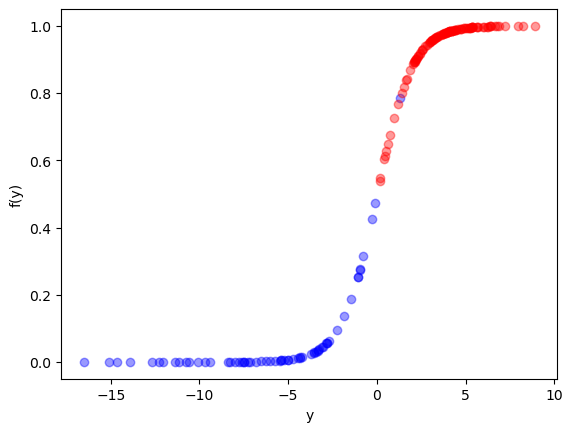

In [16]:
# 输出逻辑回归模型参数
model3=grid.best_estimator_

lr_coef3 = np.concatenate(([model3.intercept_], model3.coef_.T), axis=0)
print('Logistic Regression Model Parameters:')
for i in range(lr_coef3.shape[0]):
    print(f'k{i}: {lr_coef3[i,0]}')
# 计算测试样本的y值和f(y)值
# y_pred3 = model3.predict(X_test3)
y_score3 = model3.decision_function(X_test3)
f_y3 = 1 / (1 + np.exp(-y_score3))
# 画出y与f(y)的散点图
colors = ['b', 'r']
for i, color in enumerate(colors):
    plt.scatter(y_score3[y_test1 == i], f_y3[y_test1 == i], color=color, alpha=.4)
plt.xlabel('y')
plt.ylabel('f(y)')
plt.show()

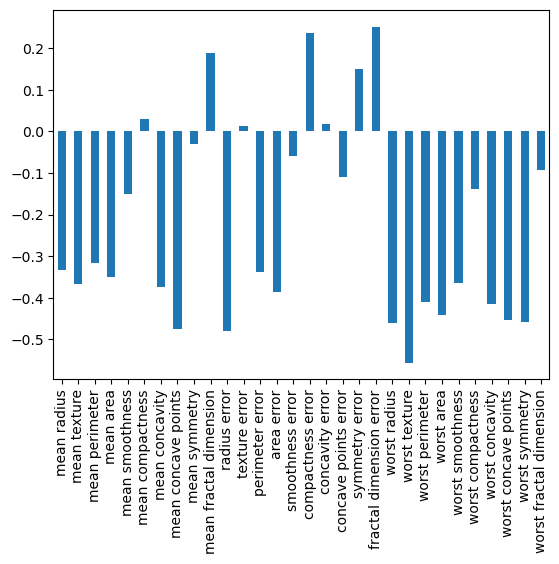

In [17]:
temp = pd.Series(np.squeeze(model3.coef_), index=X1.columns)
temp.plot(kind='bar')
plt.show()
# temp.describe()

分析上述结果可知：

- 模型的截距为0.32606596633945034
- 30个特征中对判断癌症结果影响最大的为`worst texture`，最小的为`texture error`
- 从逻辑回归判别函数散点图中可见，模型的预测结果与实际结果基本吻合，测试集上只有一个样本预测错误
- 在散点图上也可以看出，测试样本的f(y)较为集中在`0`和`1`的位置，说明模型的划分效果比较好